# Project Title:
## Empowering Businesses with Data-driven Insights for Customer Retention

### By Iqra A.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

This project begins with an extensive Exploratory Data Analysis (EDA) that prepares the data for classification. EDA techniques were used to check for missing values and replace missing observations where necessary. Columns that were considered unfit for the modelling were removed. For visualizations, the cleaned dataframe was exported to Tablue for adequate and interactive dashboard.

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_excel('data.xlsx')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data.xlsx'

In [42]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [44]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

### Observations

There are a total of 33 columns in the Data
There are a total of 7043 observations in the data
The `Churn Reason` column has a total of 5174 missing observations. This is worrisom, however not farfetched. Only customers who churned had inputs in the `Churn Reason` column. It will be a good idea to completely remove the column from the dataframe.
The `Total charges` colums has a data type of object where as the data contained in it are float values. This need to be corrected.

In [45]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [46]:
df['Total Charges'].fillna(0, inplace=True)

Now we can summarise the data to see which features will most likely not benefit our classification models, and proceed to eliminate them

In [47]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [48]:
df.describe(exclude ='number').T

,count,unique,top,freq
CustomerID,7043,7043,3668-QPYBK,1
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1129,Los Angeles,305
Lat Long,7043,1652,"33.964131, -118.272783",5
Gender,7043,2,Male,3555
Senior Citizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,5416
Phone Service,7043,2,Yes,6361


The first column that will not benefit our classification models is `Count` since it is just the count of each participant in the dataset. We also proceed to remove the `CustomerID` which is unique to each customer. We can also see that `Country`, `State` and `City` have just one category. The `Lat Long` is a replica of the `Lattiture` and `Longitude` columns. The `Churn Label` replicates our response variable `Churn Value`. The `Churn Score` column can potentially cause target leakage. We proceed to also eliminate the `Latitude`, `Longitude`, and `Zip Code` columns since almost each customer appear to be in different location. Lastly, we eliminate the `Churn Reason`. 

In [49]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Latitude', 'Longitude', 'Zip Code','Lat Long', 'Churn Label', 'Churn Reason', 'Churn Score'], axis=1, inplace=True)

Haven eliminated the unnecessary columns, we dig deeper into the categorical features in the dataset. We want to ensure that the columns are properly coded for the category they represent

In [50]:
feature_columns = ['Online Security', 'Tech Support', 'Device Protection',
                   'Online Backup', 'Streaming TV', 'Streaming Movies',
                   'Multiple Lines', 'Internet Service', 'Paperless Billing',
                   'Payment Method', 'Contract']

def unique_values(columns):
    for column in columns:
        unique_values = df[column].unique()
        print(f"{column} - {unique_values}\n")

unique_values(feature_columns)


Online Security - ['Yes' 'No' 'No internet service']

Tech Support - ['No' 'Yes' 'No internet service']

Device Protection - ['No' 'Yes' 'No internet service']

Online Backup - ['Yes' 'No' 'No internet service']

Streaming TV - ['No' 'Yes' 'No internet service']

Streaming Movies - ['No' 'Yes' 'No internet service']

Multiple Lines - ['No' 'Yes' 'No phone service']

Internet Service - ['DSL' 'Fiber optic' 'No']

Paperless Billing - ['Yes' 'No']

Payment Method - ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Contract - ['Month-to-month' 'Two year' 'One year']



We will observe that several columns have categories coded as 'No' and 'No internet service'. These two codings most definitely mean the same thing, there, we must recode the variables properly

In [51]:
duplicate_category_columns = ['Tech Support', 'Streaming Movies', 'Online Backup', 'Device Protection', 'Streaming TV', 'Online Security']

for column in duplicate_category_columns:
    df[column].replace('No internet service', 'No', inplace=True)

df['Multiple Lines'].replace('No phone service', 'No', inplace=True)


In [53]:
df.to_excel('clean_data.xlsx', index=False)

Now that we have a clean data, we export it to Tableau for visualization and set it up for modelling. But first, we need to establish the balance of the data.

<Axes: xlabel='Churn Value', ylabel='count'>

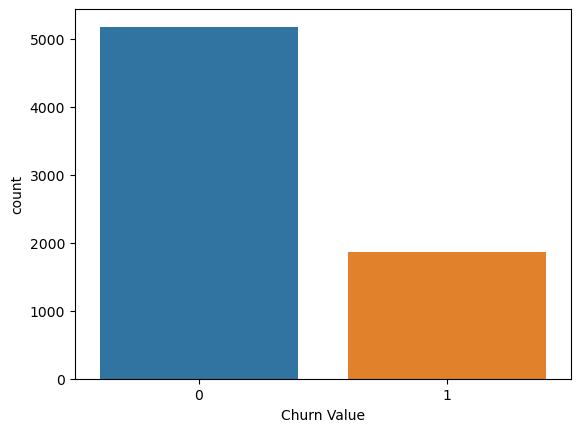

In [54]:
sns.countplot(x=df['Churn Value'])

From the above bar plot, we can observe that the data set is unbalanced. the churn value 0 has a much higher count than the churn value 1, indicating that larger number of customers churned the telecom company. With this knowledge, we can apply appropriate oversampling technique before building our models

# Machine Learning Models

In building a suitable model for our case study, we explore four different machine learning models:
### Logistic Regression
### Decision Tree
### Xgboost
### Random Forest

We will go ahead and create our training and testing sets and apply necessary oversampling on the training dataset

In [98]:
X = df.drop(['Churn Value'], axis=1) 
y = df['Churn Value']

In splitting the data set into train and test set, we use the `StratifiedKFold` method that divides our data into 5 different groups, maintaining the same balance of classes. This is especially useful since our dataset is unbalanced

In [99]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

for train, test in skf.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]


After splitting our data, we proceed to encode the categorical variables in the data and ensure the numerical variables are standardised

In [103]:

label_encoder = LabelEncoder()
standard_scaler = StandardScaler()

numerical_columns = X.select_dtypes(include=['int64', 'float64'])
categorical_columns = X.select_dtypes(include=['object'])

for cat_column in categorical_columns:
    X_train[cat_column] = label_encoder.fit_transform(X_train[cat_column])
    X_test[cat_column] = label_encoder.transform(X_test[cat_column])

for num_column in numerical_columns:
    X_train[num_column] = standard_scaler.fit_transform(X_train[[num_column]])
    X_test[num_column] = standard_scaler.transform(X_test[[num_column]])


Now we proceed to balance the dataset by oversampling using the `SMOTE` method

In [72]:
X_train, y_train = SMOTE(sampling_strategy='minority').fit_resample(X_train, y_train)

## Logistic Regression

In [73]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Accuracy: {accuracy:.2f}")
print()

class_report = classification_report(y_test, logistic_predictions)
print("Classification Report:")
print(class_report)
print()

conf_matrix = confusion_matrix(y_test, logistic_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1035
           1       0.57      0.79      0.66       373

    accuracy                           0.78      1408
   macro avg       0.74      0.78      0.75      1408
weighted avg       0.82      0.78      0.79      1408


Confusion Matrix:
[[809 226]
 [ 79 294]]


## Decision Tree

In [74]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, dt_predictions):.2f}\n")
print(classification_report(y_test, dt_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

Accuracy: 0.73

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1035
           1       0.50      0.58      0.54       373

    accuracy                           0.73      1408
   macro avg       0.67      0.68      0.67      1408
weighted avg       0.75      0.73      0.74      1408


Confusion Matrix:
[[818 217]
 [157 216]]


## XGBoost

In [75]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, xgb_predictions):.2f}\n")
print(classification_report(y_test, xgb_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))


Accuracy: 0.77

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.60       373

    accuracy                           0.77      1408
   macro avg       0.71      0.73      0.72      1408
weighted avg       0.78      0.77      0.78      1408


Confusion Matrix:
[[858 177]
 [140 233]]


## Random Forest

In [76]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)

random_forest_predictions = random_forest_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, random_forest_predictions):.2f}\n")
print(classification_report(y_test, random_forest_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, random_forest_predictions))


Accuracy: 0.79

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1035
           1       0.60      0.65      0.63       373

    accuracy                           0.79      1408
   macro avg       0.74      0.75      0.74      1408
weighted avg       0.80      0.79      0.80      1408


Confusion Matrix:
[[876 159]
 [131 242]]


## Grid Search for the Random Forest

We can see that the `Random Forest` is the best performing model among the four model. We will go ahead and perform a Grid Search for the best values to tune the hyperparameters.

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=20)
rf_estimators = [100, 200, 300, 400, 500]
rf_max_depth = [10, 12, 14, 16, 18, 20]
rf_param_grid = {'n_estimators': rf_estimators, 'max_depth': rf_max_depth}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, scoring='f1', n_jobs=-1, cv=skf)
rf_grid_result = rf_grid_search.fit(X_train, y_train)

print(f'Best Score: {rf_grid_result.best_score_} and Best Params: {rf_grid_result.best_params_}')


Best Score: 0.8594090885082789 and Best Params: {'max_depth': 18, 'n_estimators': 400}


Now, we retrain the `Random Forest` using the Best Parameters

## Retrainng the Random Forest

In [77]:

best_max_depth = 18
best_n_estimators = 400

best_random_forest_model = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=20)
best_random_forest_model.fit(X_train, y_train)

best_random_forest_predictions = best_random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, best_random_forest_predictions)
print(f"Accuracy: {accuracy:.2f}\n")

class_report = classification_report(y_test, best_random_forest_predictions)
print("Classification Report:")
print(class_report)
print()

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1035
           1       0.61      0.67      0.64       373

    accuracy                           0.80      1408
   macro avg       0.74      0.76      0.75      1408
weighted avg       0.81      0.80      0.80      1408




## Feature Importance

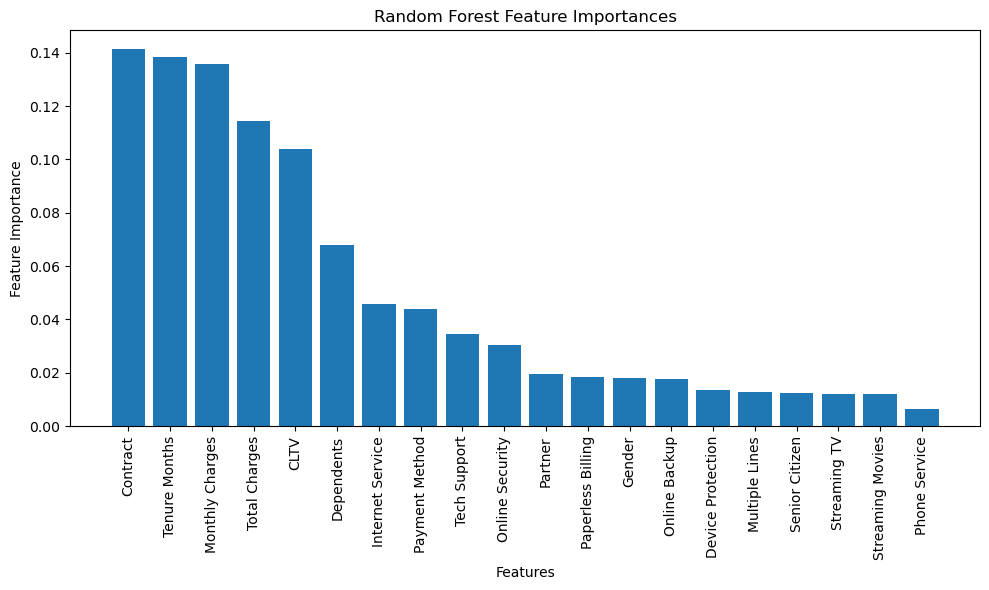

In [78]:
feature_importances = best_random_forest_model.feature_importances_

feature_names = X_train.columns

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

## Confusion Matrix for Predictions

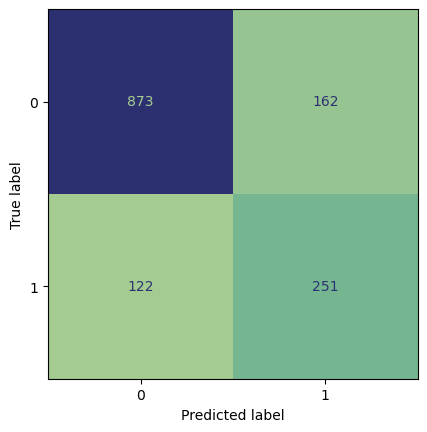

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, best_random_forest_predictions, colorbar=False, cmap='crest')